### This jupyter notebook is to unit-test CFE model run

## Preparation

In [159]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [160]:
"""
*** Final SPOTPY summary ***
Total Duration: 1102.09 seconds
Total Repetitions: 500
Maximal objective value: 0.809606
Corresponding parameter setting:
bb: 2.9772
satdk: 0.00101307
satpsi: 0.332766
slop: 0.0220126
smcmax: 0.998
wltsmc: 0.000142
max_gw_storage: 0.212122
Cgw: 0.00468641
expon: 1
K_nash: 0.0013
refkdt: 0.650845
trigger_z_fact: 0.66586
alpha_fc: 0.329949
K_lf: 0.996
num_nash_storage: 20
******************************
"""
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv",
    "catchment_area_km2": 0.1210,
    "soil_params": {
        "bb": 4.644110006820757,
        "satdk": 6.4e-06,
        "satpsi": 0.141,
        "slop": 0.03259498499163006,
        "smcmax": 0.5362769263074253,
        "wltsmc": 0.000142,
        "D": 0.6
    },
    "max_gw_storage": 0.07131124353538958,
    "Cgw": 2.583430901047755e-05,
    "expon": 2.262536693375373,
    "K_nash": 0.9663068364166432,
    "refkdt": 0.3172842866917587,
    "trigger_z_fact": 0.75,
    "alpha_fc": 0.33,
    "K_lf": 0.000424,
    "num_nash_storage":2,
    "giuh_ordinates": [
        0.5,
        0.5
    ],
    "stand_alone": 1,
    "unit_test": 1,
    "time_step_size": 86400,
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv"
}
with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

GW & SM converged <1% after warm-up iteration 1; diff_gw: 0.0000000; diff_sm: 0.0000000


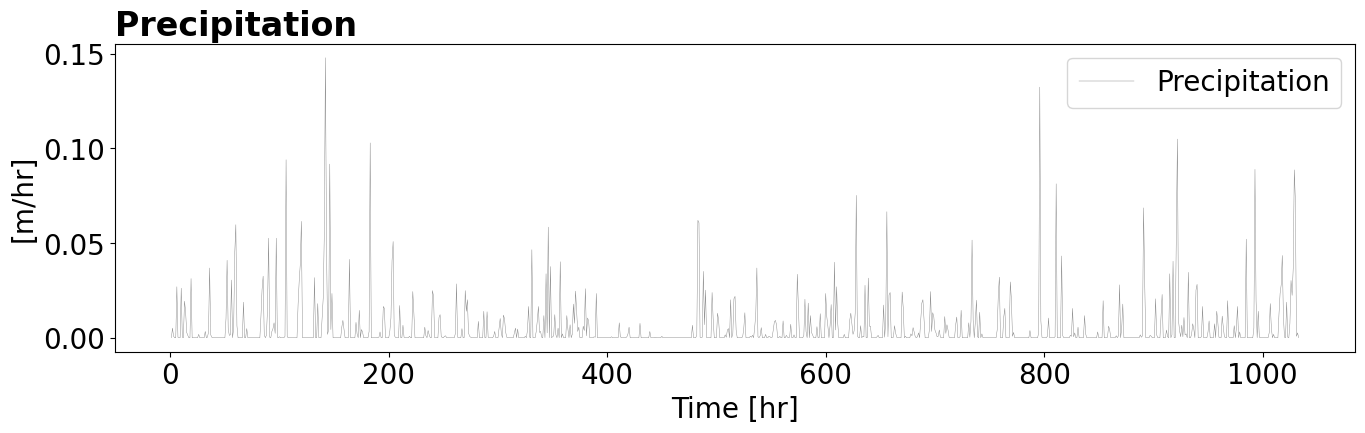

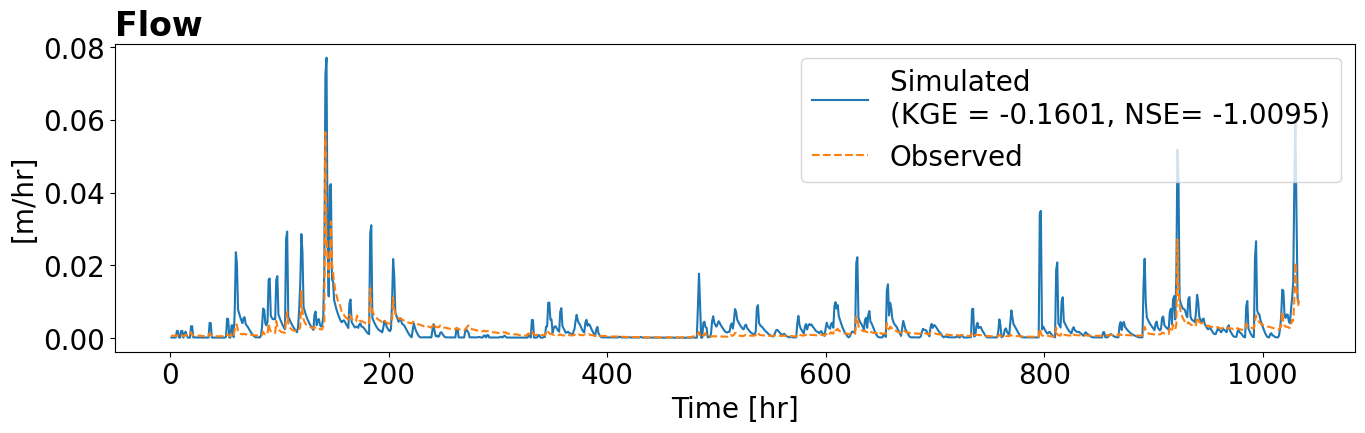

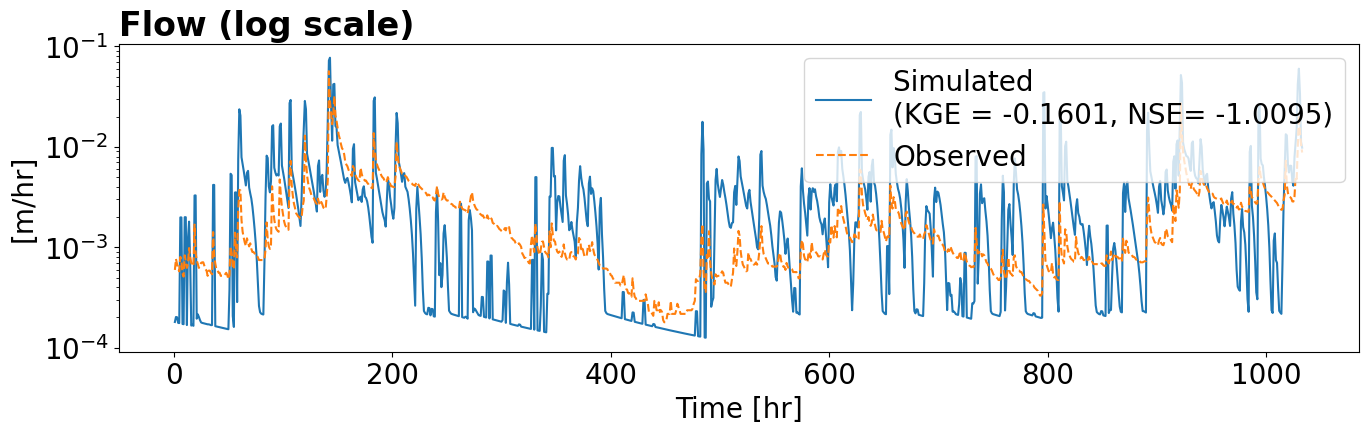

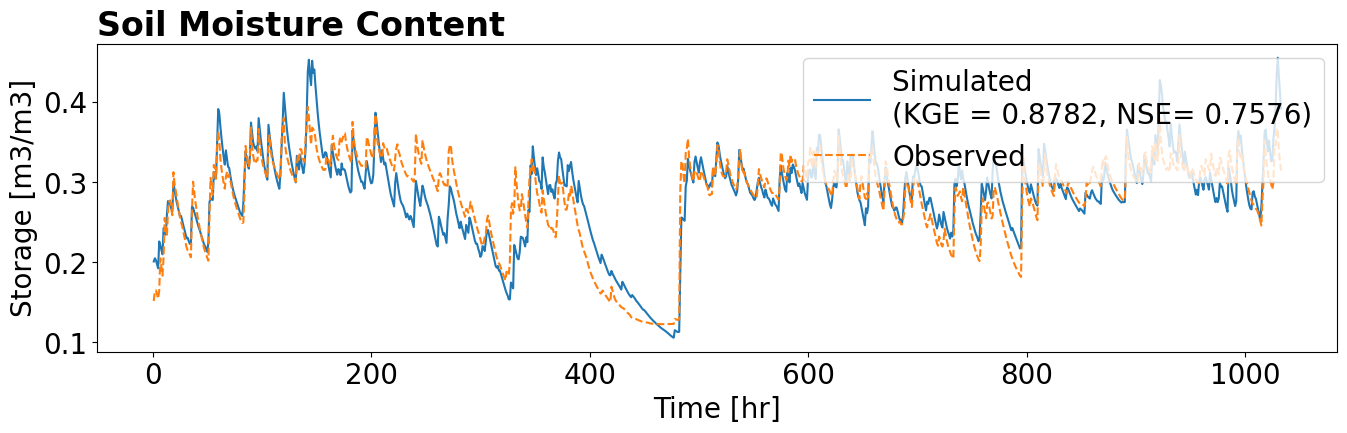

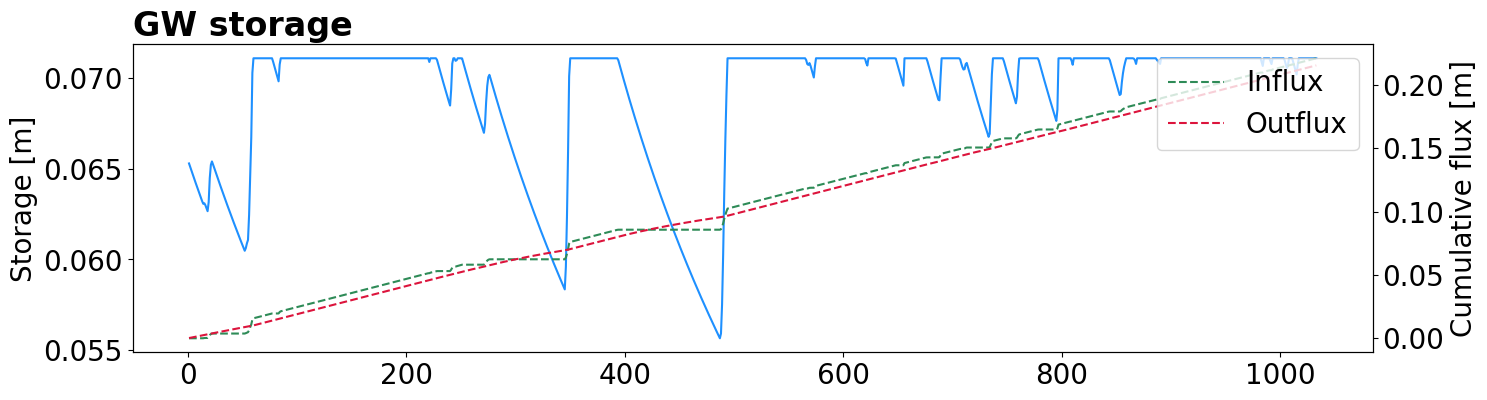

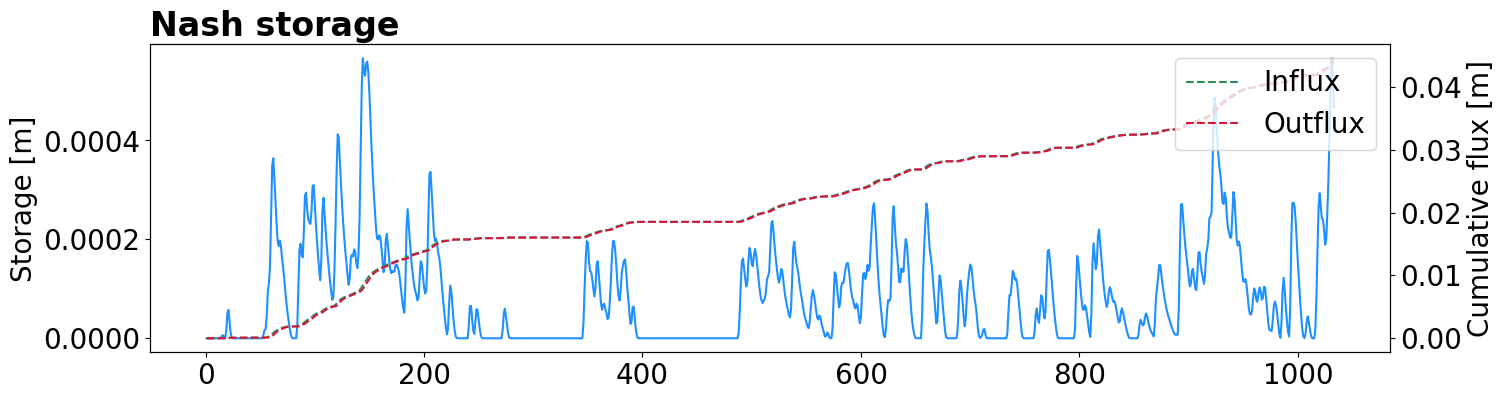

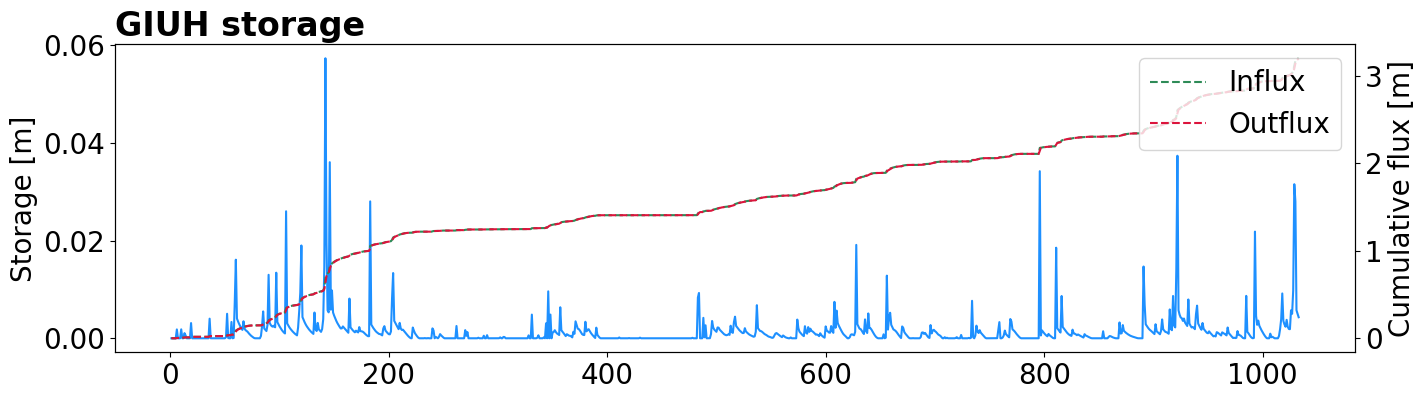


GLOBAL MASS BALANCE
      initial volume:   0.1933
        volume input:   5.7958
       volume output:   5.6902
        final volume:   0.2952
            residual: 5.5862e-14

 Discharge details
Cumulative discharge: 3.47
        Runoff ratio: 0.60
      Surface runoff: 0.92
  Deep GW to channel: 0.06
        Lateral flow: 0.01

 AET & PET
      volume PET:   2.3682
      volume AET:   2.2238
ET from rainfall:   0.6606
    ET from soil:   1.5633

SCHAAKE MASS BALANCE
    volume input:   5.7958
ET from rainfall:   0.6606
  surface runoff:   3.2096
             IOF:   1.5302
             SOF:   1.6794
    infiltration:   1.9256
schaake residual: -1.0214e-14

GIUH MASS BALANCE
  vol. into giuh:   3.2096
   vol. out giuh:   3.2060
 vol. end giuh q:   0.0036
   giuh residual: 4.4591e-15

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.1276
  vol. into soil:   1.9256
vol.soil2latflow:   0.0447
 vol. soil to gw:   0.2211
 vol. soil to ET:   1.5633
 final vol. soil:   0.2

In [161]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=True,
    plot_lims=list(range(1, 1034)),
    warm_up=True,
    warmup_offset=300,
    warmup_iteration=10
)
cfe_instance.finalize(print_mass_balance=True)